<a href="https://colab.research.google.com/github/neha-2508/TSF_GRIP_Jul-21/blob/main/NAN_GRIP_Jul'21_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TSF GRIP Jul'21 Batch**

## **Author: Neha A Nagurkar**

## **Field of Interest: Data Science & Business Analysis**

## **Task#2: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**


In [ ]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from skipy.cluster.hierarchy import linkage, dendogram, cut_tree

In [ ]:
#loading Iris dataset
import pandas as pd
from sklearn import datasets
#url = "https://bit.ly/3kXTdox"
iris_df = pd.read_csv('Iris.csv')
print('Data Imported Successfully!')
print(' ')
iris_df.head(10)

Data Imported Successfully!
 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### **Knowing the given data**

In [ ]:
#No. of. rows and columns
iris_df.shape

(150, 6)

In [ ]:
#To find if null values are present
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#To see summary of statistics
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


### **To find outliers**

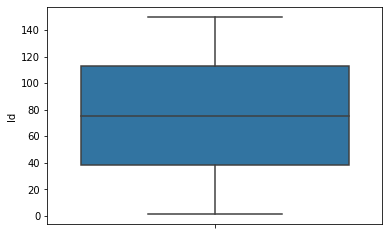

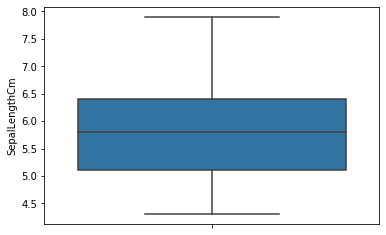

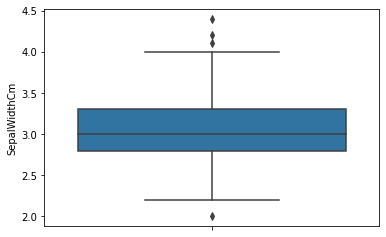

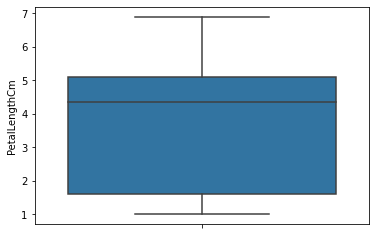

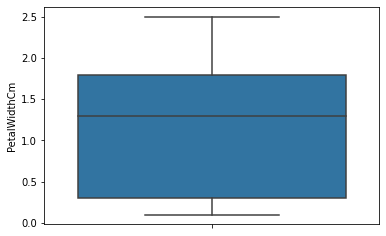

TypeError: ignored

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = iris_df.columns
for i in cols:
  sns.boxplot(y=iris_df[i])
  plt.show()

From above outliers it can be said that there are outliers in column "SepalWidthCm".

**To remove Outliers**

In [ ]:
import pandas as pd
from sklearn import datasets
iris_df = pd.read_csv('Iris.csv')
q1 = iris_df['SepalWidthCm'].quantile(0.25)
q3 = iris_df['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
iris_df = iris_df[(iris_df['SepalWidthCm'] >= q1-1.5*iqr) & (iris_df['SepalWidthCm'] <= q3+1.5*iqr)]
iris_df.shape

(146, 6)

It can be seen that after outlier treatement the number of rows are reduced to 146 from 150.

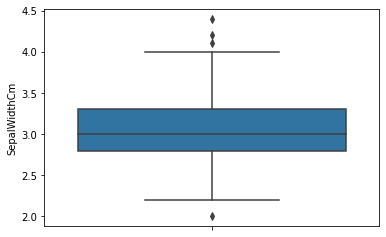

In [ ]:
#Boxplot for SepalWidthCm after outlier treatement

import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(y=iris_df['SepalWidthCm'])
plt.show()


### **To find the optimum number of clusters for K Means and determine the value of K.**

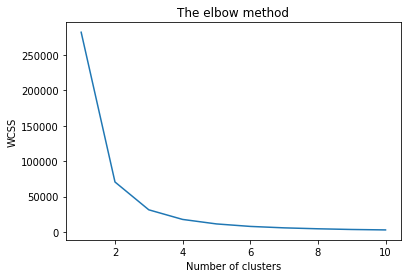

In [ ]:
import matplotlib.pyplot as plt
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### From above graph it can be seen that elbow structure is formed. Hence, it is known as **The Elbow Method**.

-> The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Hence, No

## **Applying KMeans to Dataset**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

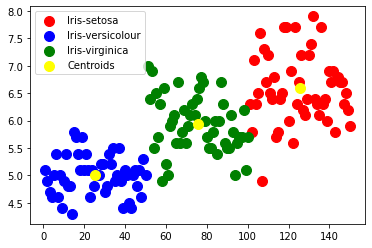

In [11]:
# Visualising the clusters - On the first two columns

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
#from sklearn import datasets
iris_df = pd.read_csv('Iris.csv')
x = iris_df.iloc[:, [0, 1, 2, 3]].values
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)


kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters for sepals
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


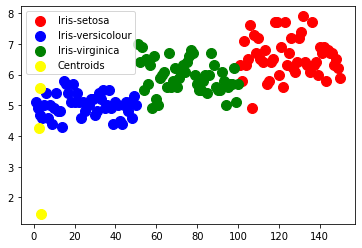

In [13]:
# Visualising the clusters - On the last two columns

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
#from sklearn import datasets
iris_df = pd.read_csv('Iris.csv')
x = iris_df.iloc[:, [0, 1, 2, 3]].values
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


#Plotting the centroids of the clusters for petals
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()